# Task 1 - Optimizers

The following optimizers are tested for learning rates of 0.01 and 0.001

* Adam
* RMSprop
* SGD

The Adam optimizer and the RMSprop converged faster and gave better results when the learning rate was 0.001, The SGD failed to converge within 100 epochs at a learning rate of 0.001. However it was performing better at 0.01 while the other two failed. .The results of training can be found in the later part of the notebook


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL.Image
import IPython.display as display
import warnings

In [ ]:
cifar10 = keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_train.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

test_data = tf.data.Dataset.from_tensor_slices(
    (x_test.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_test.astype(np.int32))).batch(64)

170500096/170498071 [==============================] - 3s 0us/step


Adam optimizer - 0.001 learning rate

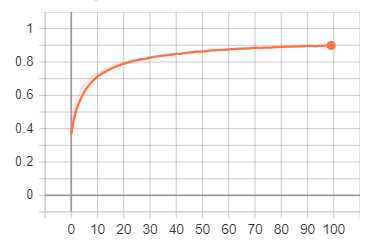

Adam optimizer - 0.01 learning rate

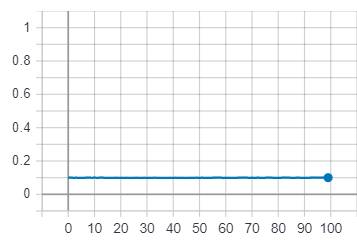

In [ ]:
learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

logdir = "logs/Adam_0.001"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
  1/391 [..............................] - ETA: 0s - loss: 2.3005 - accuracy: 0.1016WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
391/391 [==============================] - 3s 8ms/step - loss: 1.7047 - accuracy: 0.3666 - val_loss: 1.3795 - val_accuracy: 0.4953
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 1.3522 - accuracy: 0.5086 - val_loss: 1.1905 - val_accuracy: 0.5702
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.1957 - accuracy: 0.5735 - val_loss: 1.0773 - val_accuracy: 0.6138
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.1061 - accuracy: 0.6064 - val_loss: 1.0011 - val_accuracy: 0.6454
Epoch 5/100
391/391 [==============================] - 3s 7ms/step

SGD - 0.001 learning rate

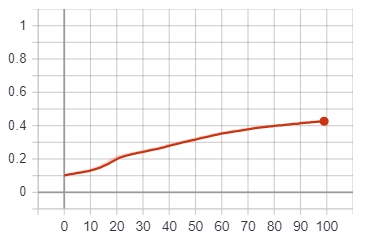

SGD - 0.01 Learning rate

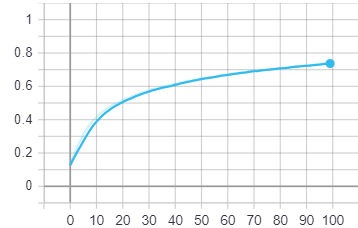

In [ ]:
learning_rate = 0.01
opt = keras.optimizers.SGD(learning_rate=learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

logdir = "logs/SGD_0.01"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
391/391 [==============================] - 3s 9ms/step - loss: 2.2974 - accuracy: 0.1271 - val_loss: 2.2835 - val_accuracy: 0.1966
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 2.2300 - accuracy: 0.1779 - val_loss: 2.1204 - val_accuracy: 0.2104
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 2.0766 - accuracy: 0.2161 - val_loss: 2.0183 - val_accuracy: 0.2465
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 2.0138 - accuracy: 0.2495 - val_loss: 1.9544 - val_accuracy: 0.2945
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 1.9485 - accuracy: 0.2772 - val_loss: 1.8915 - val_accuracy: 0.3249
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: 1.8727 - accuracy: 0.3110 - val_loss: 1.8059 - val_accuracy: 0.3555
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 1.8078 - accuracy: 0.3368 - val_loss: 1.7452 - val_accuracy: 0.3771

RMSprop - 0.001 learning rate

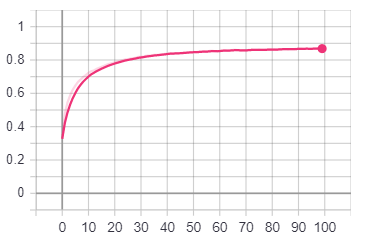

RMSprop - 0.01 learning rate

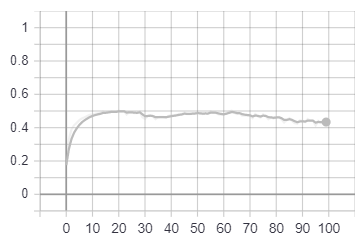